# Stock Market Prediction of NiftyIT companies using Machine Learning Techniques

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("NiftyIT.csv")
data

,Date,Price,Open,High,Low,Vol.,Change %
0,06/28/2024,"36,157.50","36,154.20","36,334.65","36,041.20",29.24M,0.09%
1,06/27/2024,"36,123.70","35,289.25","36,191.20","35,105.70",54.77M,2.03%
2,06/26/2024,"35,406.60","35,484.05","35,593.95","35,336.00",18.20M,-0.06%
3,06/25/2024,"35,426.90","35,146.65","35,468.00","35,004.85",15.98M,0.81%
4,06/24/2024,"35,143.80","35,067.75","35,282.00","34,918.15",18.07M,-0.16%
...,...,...,...,...,...,...,...
4076,01/07/2008,"4,460.95","4,580.05","4,580.05","4,453.55",11.26M,-2.86%
4077,01/04/2008,"4,592.50","4,616.35","4,654.25","4,581.45",9.17M,-0.53%
4078,01/03/2008,"4,616.85","4,679.90","4,704.60","4,602.45",12.94M,-2.24%
4079,01/02/2008,"4,722.50","4,747.40","4,765.15","4,659.40",8.14M,-0.54%


In [3]:
data.shape

(4081, 7)

In [4]:
data=data.drop(columns=['Date'])
data

,Price,Open,High,Low,Vol.,Change %
0,"36,157.50","36,154.20","36,334.65","36,041.20",29.24M,0.09%
1,"36,123.70","35,289.25","36,191.20","35,105.70",54.77M,2.03%
2,"35,406.60","35,484.05","35,593.95","35,336.00",18.20M,-0.06%
3,"35,426.90","35,146.65","35,468.00","35,004.85",15.98M,0.81%
4,"35,143.80","35,067.75","35,282.00","34,918.15",18.07M,-0.16%
...,...,...,...,...,...,...
4076,"4,460.95","4,580.05","4,580.05","4,453.55",11.26M,-2.86%
4077,"4,592.50","4,616.35","4,654.25","4,581.45",9.17M,-0.53%
4078,"4,616.85","4,679.90","4,704.60","4,602.45",12.94M,-2.24%
4079,"4,722.50","4,747.40","4,765.15","4,659.40",8.14M,-0.54%


In [5]:
data.describe()

,Price,Open,High,Low,Vol.,Change %
count,4081,4081,4081,4081,4072,4081
unique,4053,4053,4045,4044,2813,744
top,"10,929.90","11,096.40","7,380.10","11,093.60",15.26M,0.17%
freq,2,2,2,2,6,24


In [6]:
data.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        9
Change %    0
dtype: int64

In [7]:
df=data.dropna()
df

,Price,Open,High,Low,Vol.,Change %
0,"36,157.50","36,154.20","36,334.65","36,041.20",29.24M,0.09%
1,"36,123.70","35,289.25","36,191.20","35,105.70",54.77M,2.03%
2,"35,406.60","35,484.05","35,593.95","35,336.00",18.20M,-0.06%
3,"35,426.90","35,146.65","35,468.00","35,004.85",15.98M,0.81%
4,"35,143.80","35,067.75","35,282.00","34,918.15",18.07M,-0.16%
...,...,...,...,...,...,...
4075,"4,506.35","4,473.95","4,522.45","4,437.65",10.00M,1.02%
4076,"4,460.95","4,580.05","4,580.05","4,453.55",11.26M,-2.86%
4077,"4,592.50","4,616.35","4,654.25","4,581.45",9.17M,-0.53%
4078,"4,616.85","4,679.90","4,704.60","4,602.45",12.94M,-2.24%


In [8]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4072 entries, 0 to 4079
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     4072 non-null   object
 1   Open      4072 non-null   object
 2   High      4072 non-null   object
 3   Low       4072 non-null   object
 4   Vol.      4072 non-null   object
 5   Change %  4072 non-null   object
dtypes: object(6)
memory usage: 222.7+ KB


In [10]:
df.drop(columns=['Change %'],inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_30948\1658844372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Change %'],inplace=True)


,Price,Open,High,Low,Vol.
0,"36,157.50","36,154.20","36,334.65","36,041.20",29.24M
1,"36,123.70","35,289.25","36,191.20","35,105.70",54.77M
2,"35,406.60","35,484.05","35,593.95","35,336.00",18.20M
3,"35,426.90","35,146.65","35,468.00","35,004.85",15.98M
4,"35,143.80","35,067.75","35,282.00","34,918.15",18.07M
...,...,...,...,...,...
4075,"4,506.35","4,473.95","4,522.45","4,437.65",10.00M
4076,"4,460.95","4,580.05","4,580.05","4,453.55",11.26M
4077,"4,592.50","4,616.35","4,654.25","4,581.45",9.17M
4078,"4,616.85","4,679.90","4,704.60","4,602.45",12.94M


In [11]:
df.sample(10)

,Price,Open,High,Low,Vol.
3825,"2,173.55","2,176.20","2,184.15","2,118.75",22.39M
1473,"14,515.65","14,611.45","14,627.80","14,437.65",35.37K
3656,"4,997.90","4,935.25","5,016.75","4,883.35",42.31M
3725,"3,400.95","3,366.25","3,493.35","3,366.25",27.60M
884,"22,202.20","22,458.75","22,458.80","22,147.30",48.11M
3257,"6,576.50","6,641.30","6,641.30","6,516.90",10.22M
2814,"6,852.70","6,793.75","6,909.55","6,793.75",13.45M
1501,"13,595.10","13,592.40","13,646.55","13,525.20",18.46K
1772,"10,131.05","10,043.00","10,151.35","9,995.25",10.55K
655,"35,782.35","35,606.00","35,852.50","35,177.95",22.09M


In [12]:
def convert_vol(vol):
    if 'K' in vol:
        return float(vol.replace('K', ''))
    elif 'M' in vol:
        return float(vol.replace('M', '')) * 1000
    elif 'B' in vol:
        return float(vol.replace('B', '')) * 1000000
    else:
        return float(vol)/1000

def convert_to_num(dt):
    if ',' in dt:
        return float(dt.replace(',',''))
    else:
        return float(dt)

In [13]:
df['Volume(K)']=df['Vol.'].apply(convert_vol)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_30948\3236443624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume(K)']=df['Vol.'].apply(convert_vol)


,Price,Open,High,Low,Vol.,Volume(K)
0,"36,157.50","36,154.20","36,334.65","36,041.20",29.24M,29240.0
1,"36,123.70","35,289.25","36,191.20","35,105.70",54.77M,54770.0
2,"35,406.60","35,484.05","35,593.95","35,336.00",18.20M,18200.0
3,"35,426.90","35,146.65","35,468.00","35,004.85",15.98M,15980.0
4,"35,143.80","35,067.75","35,282.00","34,918.15",18.07M,18070.0
...,...,...,...,...,...,...
4075,"4,506.35","4,473.95","4,522.45","4,437.65",10.00M,10000.0
4076,"4,460.95","4,580.05","4,580.05","4,453.55",11.26M,11260.0
4077,"4,592.50","4,616.35","4,654.25","4,581.45",9.17M,9170.0
4078,"4,616.85","4,679.90","4,704.60","4,602.45",12.94M,12940.0


In [14]:
df['Price']=df['Price'].apply(convert_to_num)
df['Open']=df['Open'].apply(convert_to_num)
df['High']=df['High'].apply(convert_to_num)
df['Low']=df['Low'].apply(convert_to_num)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_30948\1879019303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price'].apply(convert_to_num)
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_30948\1879019303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open']=df['Open'].apply(convert_to_num)
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_30948\1879019303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Price,Open,High,Low,Vol.,Volume(K)
0,36157.50,36154.20,36334.65,36041.20,29.24M,29240.0
1,36123.70,35289.25,36191.20,35105.70,54.77M,54770.0
2,35406.60,35484.05,35593.95,35336.00,18.20M,18200.0
3,35426.90,35146.65,35468.00,35004.85,15.98M,15980.0
4,35143.80,35067.75,35282.00,34918.15,18.07M,18070.0
...,...,...,...,...,...,...
4075,4506.35,4473.95,4522.45,4437.65,10.00M,10000.0
4076,4460.95,4580.05,4580.05,4453.55,11.26M,11260.0
4077,4592.50,4616.35,4654.25,4581.45,9.17M,9170.0
4078,4616.85,4679.90,4704.60,4602.45,12.94M,12940.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4072 entries, 0 to 4079
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      4072 non-null   float64
 1   Open       4072 non-null   float64
 2   High       4072 non-null   float64
 3   Low        4072 non-null   float64
 4   Vol.       4072 non-null   object 
 5   Volume(K)  4072 non-null   float64
dtypes: float64(5), object(1)
memory usage: 222.7+ KB


In [16]:
df.drop(columns=['Vol.'], inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_30948\1067798956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Vol.'], inplace=True)


,Price,Open,High,Low,Volume(K)
0,36157.50,36154.20,36334.65,36041.20,29240.0
1,36123.70,35289.25,36191.20,35105.70,54770.0
2,35406.60,35484.05,35593.95,35336.00,18200.0
3,35426.90,35146.65,35468.00,35004.85,15980.0
4,35143.80,35067.75,35282.00,34918.15,18070.0
...,...,...,...,...,...
4075,4506.35,4473.95,4522.45,4437.65,10000.0
4076,4460.95,4580.05,4580.05,4453.55,11260.0
4077,4592.50,4616.35,4654.25,4581.45,9170.0
4078,4616.85,4679.90,4704.60,4602.45,12940.0


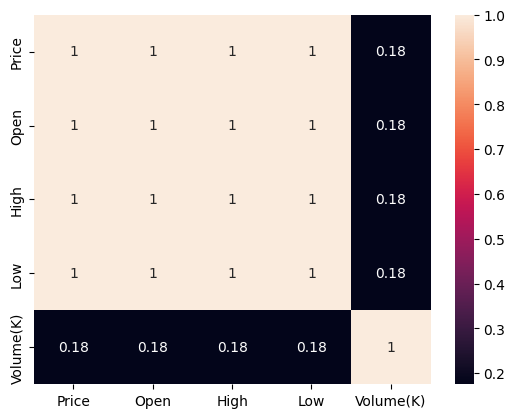

In [17]:
sns.heatmap(df.corr(),annot=True)
plt.show()

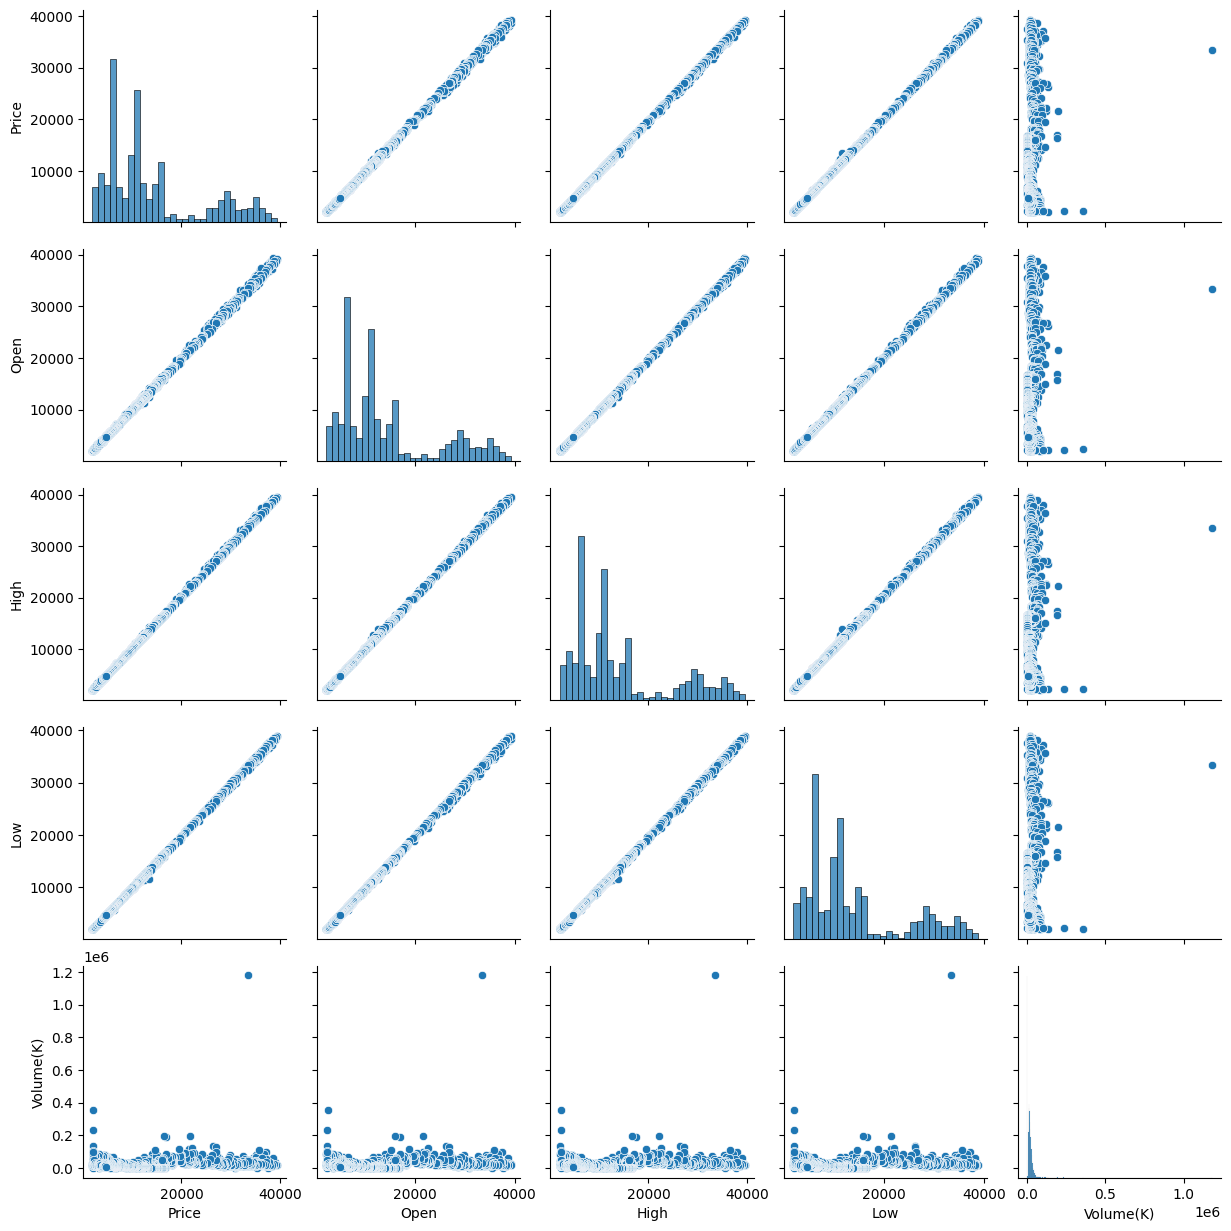

In [18]:
sns.pairplot(df,kind='scatter')
plt.show()

## Simple Linear Regression

## Taking Open as independent feature and close as dependent fearture

<function matplotlib.pyplot.show(close=None, block=None)>

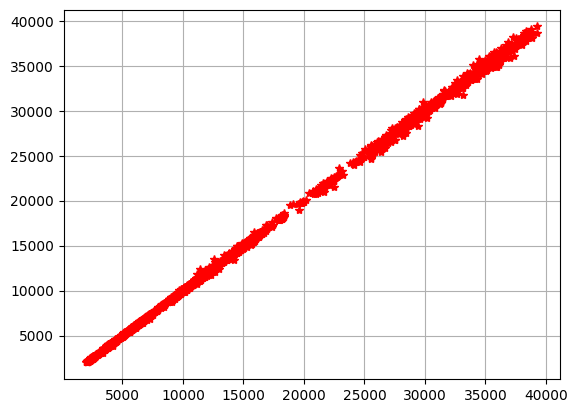

In [19]:
plt.plot(df['Open'],df['Price'],'r*')
plt.grid(True)
plt.show

In [20]:
X=df[['Open']]
X

,Open
0,36154.20
1,35289.25
2,35484.05
3,35146.65
4,35067.75
...,...
4075,4473.95
4076,4580.05
4077,4616.35
4078,4679.90


In [21]:
y=df['Price']
y

0       36157.50
1       36123.70
2       35406.60
3       35426.90
4       35143.80
          ...   
4075     4506.35
4076     4460.95
4077     4592.50
4078     4616.85
4079     4722.50
Name: Price, Length: 4072, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
print(f"Coefficient : {lr.coef_}\nintercept : {lr.intercept_}")

Coefficient : [0.99949429]
intercept : 5.671569141290092


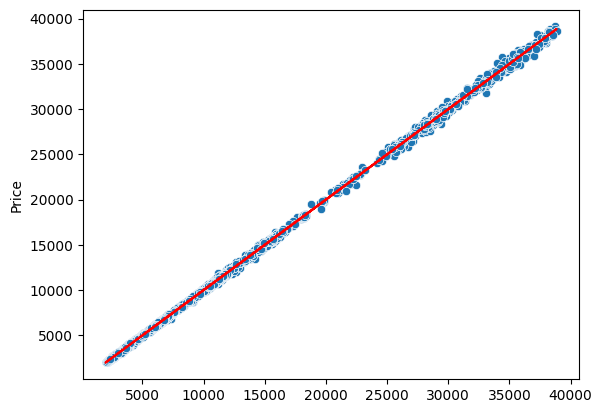

In [26]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),color='red')
plt.show()

In [27]:
pred=lr.predict(X_test)

In [28]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [29]:
import math
def find_RMSE(pred,actual):
    return math.sqrt(mean_squared_error(actual,pred))

def find_adj_r2(pred,actual):
    return 1-((1-r2_score(pred,actual))*(len(actual)-1)/(len(actual)-X_train.shape[1]-1))

In [30]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 122.3287803689447
MSE : 39007.14509073322
RMSE : 197.5022660394893
R2 : 0.999601795041288
Adj R2 : 0.9996025968125659


In [31]:
lr_mae=mean_absolute_error(y_test,pred)
lr_rmse=find_RMSE(pred,y_test)
lr_r2=r2_score(y_test,pred)

In [32]:
dt={
    'Simple_LinearReg' : [mean_absolute_error(y_test,pred)]}
mean_abs_err=pd.DataFrame(dt)
mean_abs_err

,Simple_LinearReg
0,122.32878


In [33]:
dt={
    'Simple_LinearReg' : [find_RMSE(pred,y_test)]
}
root_mean_sq_err=pd.DataFrame(dt)
root_mean_sq_err

,Simple_LinearReg
0,197.502266


In [34]:
dt={
    'Simple_LinearReg' : [r2_score(y_test,pred)]
}
R2_score=pd.DataFrame(dt)
R2_score

,Simple_LinearReg
0,0.999602


## Ridge Regression

In [35]:
from sklearn.linear_model import Ridge

In [36]:
rr=Ridge(alpha=0.1)

In [37]:
rr.fit(X_train,y_train)

Ridge(alpha=0.1)

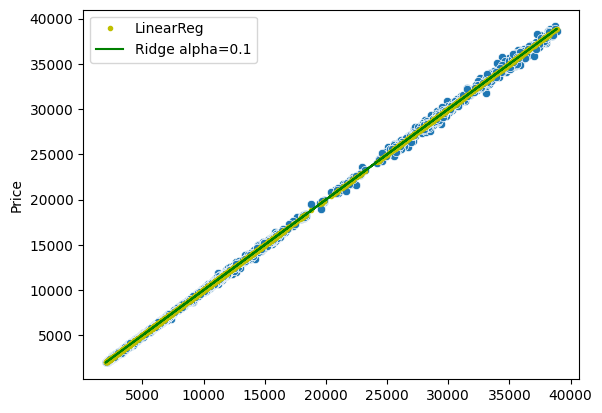

In [38]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'y.',label='LinearReg')
plt.plot(X_val,rr.predict(X_train),color='green',label='Ridge alpha=0.1')
plt.legend()
plt.show()

In [39]:
print(rr.coef_,rr.intercept_)

[0.99949429] 5.671569146405091


In [40]:
y_pred=rr.predict(X_test)

In [41]:
print(f"MAE : {mean_absolute_error(y_test,y_pred)}\nMSE : {mean_squared_error(y_test,y_pred)}\nRMSE : {find_RMSE(y_pred,y_test)}\nR2 : {r2_score(y_test,y_pred)}\nAdj R2 : {find_adj_r2(y_pred,y_test)}")

MAE : 122.32878036889242
MSE : 39007.145090611804
RMSE : 197.50226603918196
R2 : 0.9996017950412892
Adj R2 : 0.9996025968125668


In [42]:
rr_mae=mean_absolute_error(y_test,y_pred)
rr_rmse=find_RMSE(y_pred,y_test)
rr_r2=r2_score(y_test,y_pred)

In [43]:
mean_abs_err['Ridge_alpha_0.1']=[mean_absolute_error(y_test,y_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1
0,122.32878,122.32878


In [44]:
root_mean_sq_err['Ridge_alpha_0.1']=[find_RMSE(y_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1
0,197.502266,197.502266


In [45]:
R2_score['Ridge_alpha_0.1']=[r2_score(y_test,y_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1
0,0.999602,0.999602


## Lasso Regression

In [46]:
from sklearn.linear_model import Lasso

In [47]:
lsr=Lasso(alpha=0.1)

In [48]:
lsr.fit(X_train,y_train)

Lasso(alpha=0.1)

In [49]:
print(lsr.coef_,lsr.intercept_)

[0.99949428] 5.671583731893406


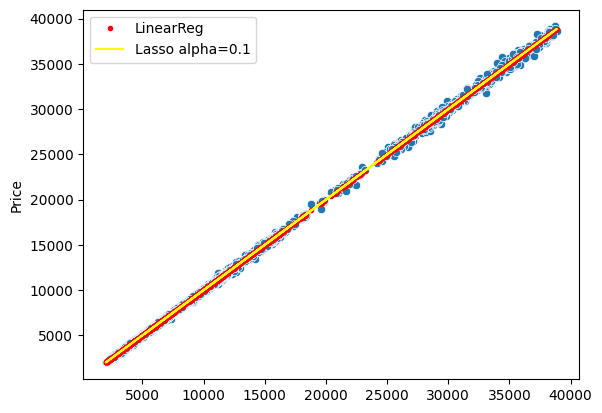

In [50]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'r.',label='LinearReg')
plt.plot(X_val,lsr.predict(X_train),color='yellow',label='Lasso alpha=0.1')
plt.legend()
plt.show()

In [51]:
yl_pred=lsr.predict(X_test)

In [52]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 122.32878021984884
MSE : 39007.14474442832
RMSE : 197.50226516277812
R2 : 0.9996017950448233
Adj R2 : 0.9996025968152628


In [53]:
lsr_mae=mean_absolute_error(y_test,yl_pred)
lsr_rmse=find_RMSE(yl_pred,y_test)
lsr_r2=r2_score(y_test,yl_pred)

In [54]:
mean_abs_err['Lasso_alpha_0.1']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,122.32878,122.32878,122.32878


In [55]:
root_mean_sq_err['Lasso_alpha_0.1']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,197.502266,197.502266,197.502265


In [56]:
R2_score['Lasso_alpha_0.1']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,0.999602,0.999602,0.999602


## Polynomial Regression

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
poly=PolynomialFeatures(degree=4)

In [59]:
X_poly = poly.fit_transform(X_train)
X_test1=poly.transform(X_test)
poly.fit(X_poly,y_train)
lin=LinearRegression()
lin.fit(X_poly,y_train)

LinearRegression()

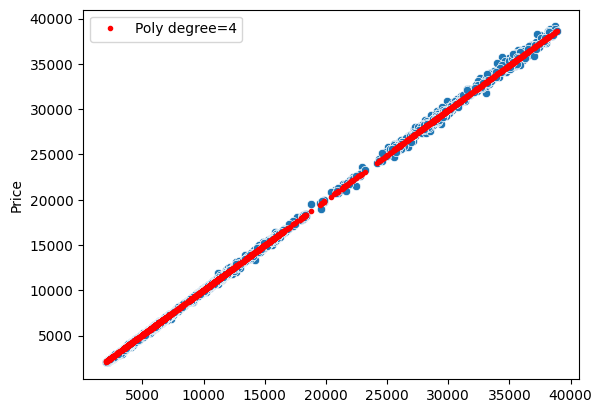

In [60]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'r.',label='Poly degree=4')
plt.legend()
plt.show()

In [61]:
yp_pred=lin.predict(X_test1)

In [62]:
print(f"MAE : {mean_absolute_error(y_test,yp_pred)}\nMSE : {mean_squared_error(y_test,yp_pred)}\nRMSE : {find_RMSE(yp_pred,y_test)}\nR2 : {r2_score(y_test,yp_pred)}\nAdj R2 : {find_adj_r2(yp_pred,y_test)}")

MAE : 136.0838254869538
MSE : 41660.74652919413
RMSE : 204.10964340078138
R2 : 0.999574705715761
Adj R2 : 0.999569285163467


In [63]:
poly_mae=mean_absolute_error(y_test,yp_pred)
poly_rmse=find_RMSE(yp_pred,y_test)
poly_r2=r2_score(y_test,yp_pred)

In [64]:
mean_abs_err['Poly_deg_4']=[mean_absolute_error(y_test,yp_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,122.32878,122.32878,122.32878,136.083825


In [65]:
root_mean_sq_err['Poly_deg_4']=[find_RMSE(yp_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,197.502266,197.502266,197.502265,204.109643


In [66]:
R2_score['Poly_deg_4']=r2_score(y_test,yp_pred)
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,0.999602,0.999602,0.999602,0.999575


## Ridge on Polynomial Regression

In [67]:
ridp=Ridge(alpha=0.1)
ridp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.58788e-40): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

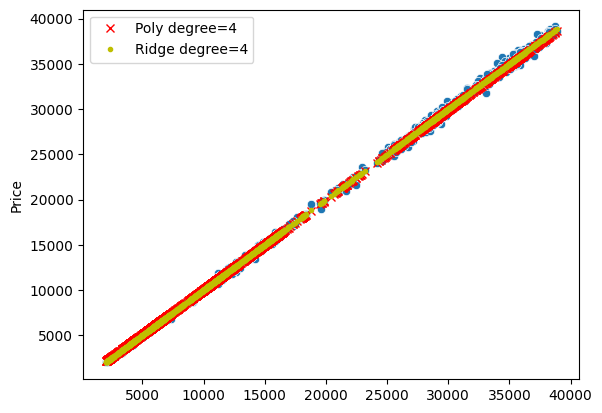

In [68]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'rx',label='Poly degree=4')
plt.plot(X_val,ridp.predict(X_poly),'y.',label='Ridge degree=4')
plt.legend()
plt.show()

In [69]:
yr_pred=ridp.predict(X_test1)

In [70]:
print(f"MAE : {mean_absolute_error(y_test,yr_pred)}\nMSE : {mean_squared_error(y_test,yr_pred)}\nRMSE : {find_RMSE(yr_pred,y_test)}\nR2 : {r2_score(y_test,yr_pred)}\nAdj R2 : {find_adj_r2(yr_pred,y_test)}")

MAE : 122.1993426625752
MSE : 38772.49755516018
RMSE : 196.9073324057796
R2 : 0.9996041904437712
Adj R2 : 0.9996050222878224


In [71]:
prr_mae=mean_absolute_error(y_test,yr_pred)
prr_rmse=find_RMSE(yr_pred,y_test)
prr_r2=r2_score(y_test,yr_pred)

In [72]:
mean_abs_err['Ridge_0.1_Poly_4']=[mean_absolute_error(y_test,yr_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,122.32878,122.32878,122.32878,136.083825,122.199343


In [73]:
root_mean_sq_err['Ridge_0.1_Poly_4']=[find_RMSE(yr_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,197.502266,197.502266,197.502265,204.109643,196.907332


In [74]:
R2_score['Ridge_0.1_Poly_4']=[r2_score(y_test,yr_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,0.999602,0.999602,0.999602,0.999575,0.999604


## Lasso on polynomial of degree 4

In [75]:
lsp=Lasso(alpha=0.1)
lsp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.784e+07, tolerance: 2.725e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

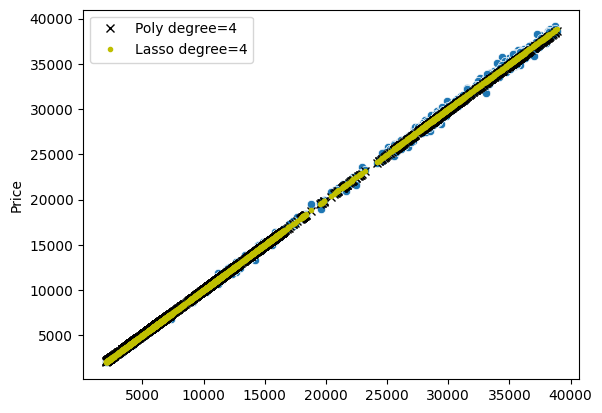

In [76]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'kx',label='Poly degree=4')
plt.plot(X_val,lsp.predict(X_poly),'y.',label='Lasso degree=4')
plt.legend()
plt.show()

In [77]:
yl_pred=lsp.predict(X_test1)

In [78]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 122.27200324276228
MSE : 38848.6841960908
RMSE : 197.1006955748528
R2 : 0.9996034126914355
Adj R2 : 0.9996042330048908


In [79]:
plsr_mae=mean_absolute_error(y_test,yl_pred)
plsr_rmse=find_RMSE(yl_pred,y_test)
plsr_r2=r2_score(y_test,yl_pred)

In [80]:
mean_abs_err['Lasso_0.1_Poly_4']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,122.32878,122.32878,122.32878,136.083825,122.199343,122.272003


In [81]:
root_mean_sq_err['Lasso_0.1_Poly_4']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,197.502266,197.502266,197.502265,204.109643,196.907332,197.100696


In [82]:
R2_score['Lasso_0.1_Poly_4']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,0.999602,0.999602,0.999602,0.999575,0.999604,0.999603


## Multiple Linear Regression

In [83]:
df

,Price,Open,High,Low,Volume(K)
0,36157.50,36154.20,36334.65,36041.20,29240.0
1,36123.70,35289.25,36191.20,35105.70,54770.0
2,35406.60,35484.05,35593.95,35336.00,18200.0
3,35426.90,35146.65,35468.00,35004.85,15980.0
4,35143.80,35067.75,35282.00,34918.15,18070.0
...,...,...,...,...,...
4075,4506.35,4473.95,4522.45,4437.65,10000.0
4076,4460.95,4580.05,4580.05,4453.55,11260.0
4077,4592.50,4616.35,4654.25,4581.45,9170.0
4078,4616.85,4679.90,4704.60,4602.45,12940.0


In [84]:
df.drop(columns=['High','Low'],inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_30948\4086614560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['High','Low'],inplace=True)


,Price,Open,Volume(K)
0,36157.50,36154.20,29240.0
1,36123.70,35289.25,54770.0
2,35406.60,35484.05,18200.0
3,35426.90,35146.65,15980.0
4,35143.80,35067.75,18070.0
...,...,...,...
4075,4506.35,4473.95,10000.0
4076,4460.95,4580.05,11260.0
4077,4592.50,4616.35,9170.0
4078,4616.85,4679.90,12940.0


In [85]:
X=df.drop(columns=['Price'])
X

,Open,Volume(K)
0,36154.20,29240.0
1,35289.25,54770.0
2,35484.05,18200.0
3,35146.65,15980.0
4,35067.75,18070.0
...,...,...
4075,4473.95,10000.0
4076,4580.05,11260.0
4077,4616.35,9170.0
4078,4679.90,12940.0


In [86]:
y=df['Price']
y

0       36157.50
1       36123.70
2       35406.60
3       35426.90
4       35143.80
          ...   
4075     4506.35
4076     4460.95
4077     4592.50
4078     4616.85
4079     4722.50
Name: Price, Length: 4072, dtype: float64

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [88]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [89]:
cdf=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf

,coef_lin
Open,0.999345
Volume(K),0.000309


In [90]:
mlin.intercept_

2.2495723903812177

In [91]:
pred=mlin.predict(X_test)

In [92]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 122.4571019439396
MSE : 39030.15426815021
RMSE : 197.56050786569216
R2 : 0.9996015601517948
Adj R2 : 0.999602014564931


In [93]:
mlr_mae=mean_absolute_error(y_test,pred)
mlr_rmse=find_RMSE(pred,y_test)
mlr_r2=r2_score(y_test,pred)

In [94]:
mean_abs_err['Mul_LinearReg']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,122.32878,122.32878,122.32878,136.083825,122.199343,122.272003,122.457102


In [95]:
root_mean_sq_err['Mul_LinearReg'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,197.502266,197.502266,197.502265,204.109643,196.907332,197.100696,197.560508


In [96]:
R2_score['Mul_LinearReg']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,0.999602,0.999602,0.999602,0.999575,0.999604,0.999603,0.999602


## Applying Ridge Regression on Multiple Linear Regression

In [97]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [98]:
cdf['coef_ridge']=ridm.coef_
cdf

,coef_lin,coef_ridge
Open,0.999345,0.999345
Volume(K),0.000309,0.000309


In [99]:
ridm.intercept_

2.2495723952470144

In [100]:
pred=ridm.predict(X_test)

In [101]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 122.45710194389372
MSE : 39030.15426803485
RMSE : 197.56050786540018
R2 : 0.9996015601517959
Adj R2 : 0.9996020145649319


In [102]:
mrr_mae=mean_absolute_error(y_test,pred)
mrr_rmse=find_RMSE(pred,y_test)
mrr_r2=r2_score(y_test,pred)

In [103]:
mean_abs_err['Mul_Ridge_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,122.32878,122.32878,122.32878,136.083825,122.199343,122.272003,122.457102,122.457102


In [104]:
root_mean_sq_err['Mul_Ridge_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,197.502266,197.502266,197.502265,204.109643,196.907332,197.100696,197.560508,197.560508


In [105]:
R2_score['Mul_Ridge_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,0.999602,0.999602,0.999602,0.999575,0.999604,0.999603,0.999602,0.999602


## Applying Lasso Regression on Multiple Linear Regression

In [106]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [107]:
cdf['coef_lasso']=lso.coef_
cdf

,coef_lin,coef_ridge,coef_lasso
Open,0.999345,0.999345,0.999345
Volume(K),0.000309,0.000309,0.000309


In [108]:
lso.intercept_

2.249541183711699

In [109]:
pred=lso.predict(X_test)

In [110]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 122.45710216258921
MSE : 39030.15501940597
RMSE : 197.56050976702295
R2 : 0.9996015601441256
Adj R2 : 0.9996020145592525


In [111]:
mlsr_mae=mean_absolute_error(y_test,pred)
mlsr_rmse=find_RMSE(pred,y_test)
mlsr_r2=r2_score(y_test,pred)

In [112]:
mean_abs_err['Mul_Lasso_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,122.32878,122.32878,122.32878,136.083825,122.199343,122.272003,122.457102,122.457102,122.457102


In [113]:
root_mean_sq_err['Mul_Lasso_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,197.502266,197.502266,197.502265,204.109643,196.907332,197.100696,197.560508,197.560508,197.56051


In [114]:
R2_score['Mul_Lasso_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,0.999602,0.999602,0.999602,0.999575,0.999604,0.999603,0.999602,0.999602,0.999602


## adding more Features

In [115]:
df

,Price,Open,Volume(K)
0,36157.50,36154.20,29240.0
1,36123.70,35289.25,54770.0
2,35406.60,35484.05,18200.0
3,35426.90,35146.65,15980.0
4,35143.80,35067.75,18070.0
...,...,...,...
4075,4506.35,4473.95,10000.0
4076,4460.95,4580.05,11260.0
4077,4592.50,4616.35,9170.0
4078,4616.85,4679.90,12940.0


In [116]:
df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_30948\2831065476.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_30948\2831065476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg
0,36157.50,36154.20,29240.0,35485.035714
1,36123.70,35289.25,54770.0,35485.035714
2,35406.60,35484.05,18200.0,35485.035714
3,35426.90,35146.65,15980.0,35485.035714
4,35143.80,35067.75,18070.0,35485.035714
...,...,...,...,...
4075,4506.35,4473.95,10000.0,4358.407143
4076,4460.95,4580.05,11260.0,4399.500000
4077,4592.50,4616.35,9170.0,4456.228571
4078,4616.85,4679.90,12940.0,4506.042857


In [117]:
df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_30948\1927853552.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_30948\1927853552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg,14DaysMavg
0,36157.50,36154.20,29240.0,35485.035714,35087.932143
1,36123.70,35289.25,54770.0,35485.035714,35087.932143
2,35406.60,35484.05,18200.0,35485.035714,35087.932143
3,35426.90,35146.65,15980.0,35485.035714,35087.932143
4,35143.80,35067.75,18070.0,35485.035714,35087.932143
...,...,...,...,...,...
4075,4506.35,4473.95,10000.0,4358.407143,4115.260714
4076,4460.95,4580.05,11260.0,4399.500000,4151.889286
4077,4592.50,4616.35,9170.0,4456.228571,4213.778571
4078,4616.85,4679.90,12940.0,4506.042857,4270.710714


In [118]:
delta=df['Price'].diff()
gain=delta.where(delta>0,0)
loss=delta.where(delta<0,0)
avg_gain=gain.rolling(window=14).mean()
avg_loss=loss.rolling(window=14).mean()
rs=avg_gain/avg_loss
df['RSI']=100-(100/(1+rs))
df['RSI'].fillna(method='bfill',inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_30948\3173424381.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI']=100-(100/(1+rs))
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_30948\3173424381.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RSI']

,Price,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,36157.50,36154.20,29240.0,35485.035714,35087.932143,-23.313410
1,36123.70,35289.25,54770.0,35485.035714,35087.932143,-23.313410
2,35406.60,35484.05,18200.0,35485.035714,35087.932143,-23.313410
3,35426.90,35146.65,15980.0,35485.035714,35087.932143,-23.313410
4,35143.80,35067.75,18070.0,35485.035714,35087.932143,-23.313410
...,...,...,...,...,...,...
4075,4506.35,4473.95,10000.0,4358.407143,4115.260714,162.096088
4076,4460.95,4580.05,11260.0,4399.500000,4151.889286,194.296022
4077,4592.50,4616.35,9170.0,4456.228571,4213.778571,130.174851
4078,4616.85,4679.90,12940.0,4506.042857,4270.710714,132.802208


<Axes: >

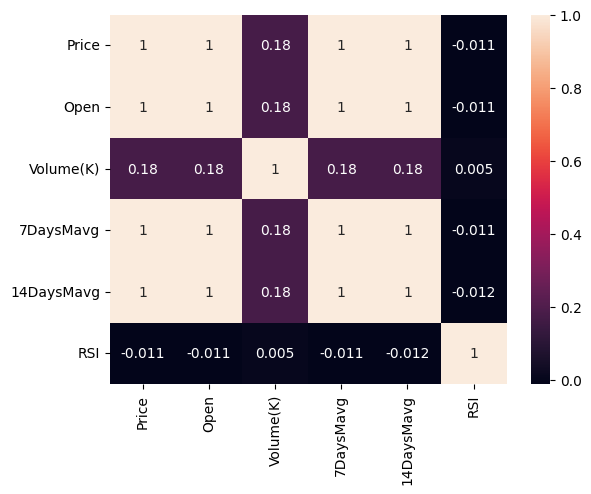

In [119]:
sns.heatmap(df.corr(),annot=True)

In [120]:
X=df.drop(columns='Price')
X

,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,36154.20,29240.0,35485.035714,35087.932143,-23.313410
1,35289.25,54770.0,35485.035714,35087.932143,-23.313410
2,35484.05,18200.0,35485.035714,35087.932143,-23.313410
3,35146.65,15980.0,35485.035714,35087.932143,-23.313410
4,35067.75,18070.0,35485.035714,35087.932143,-23.313410
...,...,...,...,...,...
4075,4473.95,10000.0,4358.407143,4115.260714,162.096088
4076,4580.05,11260.0,4399.500000,4151.889286,194.296022
4077,4616.35,9170.0,4456.228571,4213.778571,130.174851
4078,4679.90,12940.0,4506.042857,4270.710714,132.802208


In [121]:
y=df['Price']
y

0       36157.50
1       36123.70
2       35406.60
3       35426.90
4       35143.80
          ...   
4075     4506.35
4076     4460.95
4077     4592.50
4078     4616.85
4079     4722.50
Name: Price, Length: 4072, dtype: float64

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [123]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [124]:
cdf1=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf1

,coef_lin
Open,0.702958
Volume(K),0.000104
7DaysMavg,0.462731
14DaysMavg,-0.166269
RSI,-0.000364


In [125]:
mlin.intercept_

2.7985810391128325

In [126]:
pred=mlin.predict(X_test)

In [127]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 106.54233837295692
MSE : 28823.367486367773
RMSE : 169.7744606422526
R2 : 0.9997057562702127
Adj R2 : 0.999704968956412


In [128]:
mean_abs_err['Mul_LinearReg+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,122.32878,122.32878,122.32878,136.083825,122.199343,122.272003,122.457102,122.457102,122.457102,106.542338


In [129]:
root_mean_sq_err['Mul_LinearReg+'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,197.502266,197.502266,197.502265,204.109643,196.907332,197.100696,197.560508,197.560508,197.56051,169.774461


In [130]:
R2_score['Mul_LinearReg+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,0.999602,0.999602,0.999602,0.999575,0.999604,0.999603,0.999602,0.999602,0.999602,0.999706


## Ridge

In [131]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [132]:
cdf1['coef_ridge']=ridm.coef_
cdf1

,coef_lin,coef_ridge
Open,0.702958,0.702958
Volume(K),0.000104,0.000104
7DaysMavg,0.462731,0.462731
14DaysMavg,-0.166269,-0.166269
RSI,-0.000364,-0.000364


In [133]:
ridm.intercept_

2.798581036635369

In [134]:
pred=ridm.predict(X_test)

In [135]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 106.54233836803098
MSE : 28823.367483414033
RMSE : 169.7744606335536
R2 : 0.9997057562702429
Adj R2 : 0.9997049689564418


In [136]:
mean_abs_err['Mul_Ridge_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,122.32878,122.32878,122.32878,136.083825,122.199343,122.272003,122.457102,122.457102,122.457102,106.542338,106.542338


In [137]:
root_mean_sq_err['Mul_Ridge_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,197.502266,197.502266,197.502265,204.109643,196.907332,197.100696,197.560508,197.560508,197.56051,169.774461,169.774461


In [138]:
R2_score['Mul_Ridge_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,0.999602,0.999602,0.999602,0.999575,0.999604,0.999603,0.999602,0.999602,0.999602,0.999706,0.999706


## Lasso

In [139]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.668e+07, tolerance: 2.725e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [140]:
cdf1['coef_lasso']=lso.coef_
cdf1

,coef_lin,coef_ridge,coef_lasso
Open,0.702958,0.702958,0.830932
Volume(K),0.000104,0.000104,0.000199
7DaysMavg,0.462731,0.462731,0.208979
14DaysMavg,-0.166269,-0.166269,-0.040492
RSI,-0.000364,-0.000364,-0.000295


In [141]:
lso.intercept_

0.46354868052549136

In [145]:
pred=lso.predict(X_test)

In [146]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 109.13336113901308
MSE : 30259.562647686176
RMSE : 173.9527598162391
R2 : 0.9996910948528344
Adj R2 : 0.9996904449678552


In [147]:
mean_abs_err['Mul_Lasso_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,122.32878,122.32878,122.32878,136.083825,122.199343,122.272003,122.457102,122.457102,122.457102,106.542338,106.542338,109.133361


In [148]:
root_mean_sq_err['Mul_Lasso_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,197.502266,197.502266,197.502265,204.109643,196.907332,197.100696,197.560508,197.560508,197.56051,169.774461,169.774461,173.95276


In [149]:
R2_score['Mul_Lasso_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,0.999602,0.999602,0.999602,0.999575,0.999604,0.999603,0.999602,0.999602,0.999602,0.999706,0.999706,0.999691
